In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics as st

In [26]:
df = pd.read_csv('preprocessed_data(1).csv')

In [27]:
df

,Date,Symbol,apturnover,arturnover,assetturnover,croic,commontocap,currentratio,ebitdagrowth,fcffgrowth,...,roe_simple,stdebttocap,enterprisevalue,country,employees,security_delisted,sic,ipo_price,current_price,success
0,2020-12-30,RSI,NaN,16.1314,1.6674,NaN,0.231097,0.7344,-4.970785,NaN,...,2.130902,0.000000,663437419.9,United States of America,0.0,FALSE,7990.0,21.130000,9.00,NaN
1,2020-12-23,PHAR,NaN,5.4113,0.5199,-0.325334,0.340220,5.5220,-0.037194,-0.967302,...,0.227771,0.000000,9838328205,Netherlands,258.0,FALSE,2834.0,19.190000,8.79,NaN
2,2020-12-22,XL,7.1506,3.4712,0.1142,NaN,0.998900,38.0183,-3.426013,NaN,...,-0.320843,0.000582,1677155081,United States of America,0.0,FALSE,3714.0,18.890000,2.07,NaN
3,2020-12-11,VVOS,1.5772,11.3512,0.7948,NaN,0.929146,2.6070,-0.145210,NaN,...,-0.712693,0.047616,90718022.3,United States of America,97.0,FALSE,3841.0,7.070000,2.81,NaN
4,2020-12-10,DM,3.5377,2.9840,0.0395,NaN,0.981003,20.0856,0.737047,NaN,...,-0.065930,0.018997,3619117466,United States of America,0.0,FALSE,3577.0,19.730000,3.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,2012-06-26,EQM,0.5954,4.9638,0.3077,-0.479825,0.759572,2.1685,1.185208,0.188767,...,0.184397,0.000000,1931194121,United States of America,0.0,True,4922.0,14.514677,1.00,NaN
902,2012-05-11,IRG,19.3188,65.8114,2.4524,0.019854,0.702414,0.6540,0.170757,1.025517,...,0.082040,0.000000,341348000,NaN,461.0,True,5812.0,16.850000,1.00,NaN
903,2012-05-10,ADNC,7.1319,13.4547,1.3039,0.966075,1.000000,6.4160,0.737988,2.599090,...,0.106876,0.000000,35349930,United States of America,319.0,True,3674.0,19.000000,1.00,NaN
904,2012-04-27,EDG,2.6535,7.0184,0.3407,-0.021939,0.703960,1.6537,-0.208686,-1.124927,...,0.110320,0.004761,8156529071,South Africa,8964.0,True,1040.0,10.350000,1.00,NaN


PART 1

In [28]:
def success_req(df, col1, col2, target_col):
    
    """
    This function checks and modifies requirements for 
    success/failure of target value

    Parameters:

    df - df to be modified
    col1 - First column to check requirement
    col2 - First column to check requirement
    target_col - Target Columm

    """
        
    #STOCK SUCCESS REQUIREMENTS - if delisted then stock success is False
    df.loc[(df[col1] == 0), target_col] = False
    #current price is equal or lower than 50% of the ipo price it is False
    df.loc[(df[col1] >= df[col2]/2), target_col] = True
    #check logic
    df.loc[(df[col1] < df[col2]/2), target_col] = False
    
    return df

In [29]:
success_req(df, "current_price", "ipo_price", "success")

,Date,Symbol,apturnover,arturnover,assetturnover,croic,commontocap,currentratio,ebitdagrowth,fcffgrowth,...,roe_simple,stdebttocap,enterprisevalue,country,employees,security_delisted,sic,ipo_price,current_price,success
0,2020-12-30,RSI,NaN,16.1314,1.6674,NaN,0.231097,0.7344,-4.970785,NaN,...,2.130902,0.000000,663437419.9,United States of America,0.0,FALSE,7990.0,21.130000,9.00,False
1,2020-12-23,PHAR,NaN,5.4113,0.5199,-0.325334,0.340220,5.5220,-0.037194,-0.967302,...,0.227771,0.000000,9838328205,Netherlands,258.0,FALSE,2834.0,19.190000,8.79,False
2,2020-12-22,XL,7.1506,3.4712,0.1142,NaN,0.998900,38.0183,-3.426013,NaN,...,-0.320843,0.000582,1677155081,United States of America,0.0,FALSE,3714.0,18.890000,2.07,False
3,2020-12-11,VVOS,1.5772,11.3512,0.7948,NaN,0.929146,2.6070,-0.145210,NaN,...,-0.712693,0.047616,90718022.3,United States of America,97.0,FALSE,3841.0,7.070000,2.81,False
4,2020-12-10,DM,3.5377,2.9840,0.0395,NaN,0.981003,20.0856,0.737047,NaN,...,-0.065930,0.018997,3619117466,United States of America,0.0,FALSE,3577.0,19.730000,3.80,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,2012-06-26,EQM,0.5954,4.9638,0.3077,-0.479825,0.759572,2.1685,1.185208,0.188767,...,0.184397,0.000000,1931194121,United States of America,0.0,True,4922.0,14.514677,1.00,False
902,2012-05-11,IRG,19.3188,65.8114,2.4524,0.019854,0.702414,0.6540,0.170757,1.025517,...,0.082040,0.000000,341348000,NaN,461.0,True,5812.0,16.850000,1.00,False
903,2012-05-10,ADNC,7.1319,13.4547,1.3039,0.966075,1.000000,6.4160,0.737988,2.599090,...,0.106876,0.000000,35349930,United States of America,319.0,True,3674.0,19.000000,1.00,False
904,2012-04-27,EDG,2.6535,7.0184,0.3407,-0.021939,0.703960,1.6537,-0.208686,-1.124927,...,0.110320,0.004761,8156529071,South Africa,8964.0,True,1040.0,10.350000,1.00,False


In [30]:
df.success.value_counts()

False    483
True     413
Name: success, dtype: int64

In [31]:
"""
Percentage of stocks that are successful
"""
success_rate = df.success.value_counts()[True]/df.success.value_counts().sum()
success_rate*100

46.09375

PART 2

In [32]:
df['price_change_rate'] = (df['current_price'] - df['ipo_price'])/df['ipo_price']*100
df['price_change_rate']

0     -57.406531
1     -54.194893
2     -89.041821
3     -60.254597
4     -80.739990
         ...    
901   -93.110422
902   -94.065282
903   -94.736842
904   -90.338164
905   -47.473684
Name: price_change_rate, Length: 906, dtype: float64

In [33]:
"""
Percentage of growth in price of increasing stocks
"""
df.loc[df['price_change_rate'] > 0, 'price_change_rate'].sum() / (df['price_change_rate'] > 0).sum()

185.84323490220868

In [34]:
"""
Percentage of growth in price of decreasing stocks
"""
df.loc[df['price_change_rate'] < 0, 'price_change_rate'].sum() / (df['price_change_rate'] < 0).sum()

-68.98420631520631

In [35]:
"""
Percentage of growth in price of all stocks
"""
df['price_change_rate'].sum() / df['price_change_rate'].count()

7.520907175289941

PART 4

In [36]:
"""
distribution of country of ipo
"""
df.country.value_counts()

United States of America      662
China                          99
United Kingdom                 13
Canada                         11
Israel                         11
France                          7
Germany                         7
Hong Kong                       6
Luxembourg                      5
Cayman Islands                  5
Bermuda                         5
Brazil                          5
Netherlands                     5
Singapore                       3
Switzerland                     2
Belgium                         2
Argentina                       2
Ireland                         2
Denmark                         2
Japan                           2
Indonesia                       1
Georgia                         1
United Arab Emirates            1
Sweden                          1
Monaco                          1
Mexico                          1
CANADA                          1
Taiwan, Province Of China       1
Ghana                           1
Jersey        

In [37]:
"""
Number of countries that have ipo
"""
df.country.value_counts().count()

36

In [38]:
"""
Number of countries that have more than 1 ipo
"""
df.country.value_counts()[df.country.value_counts() > 1].count()

20

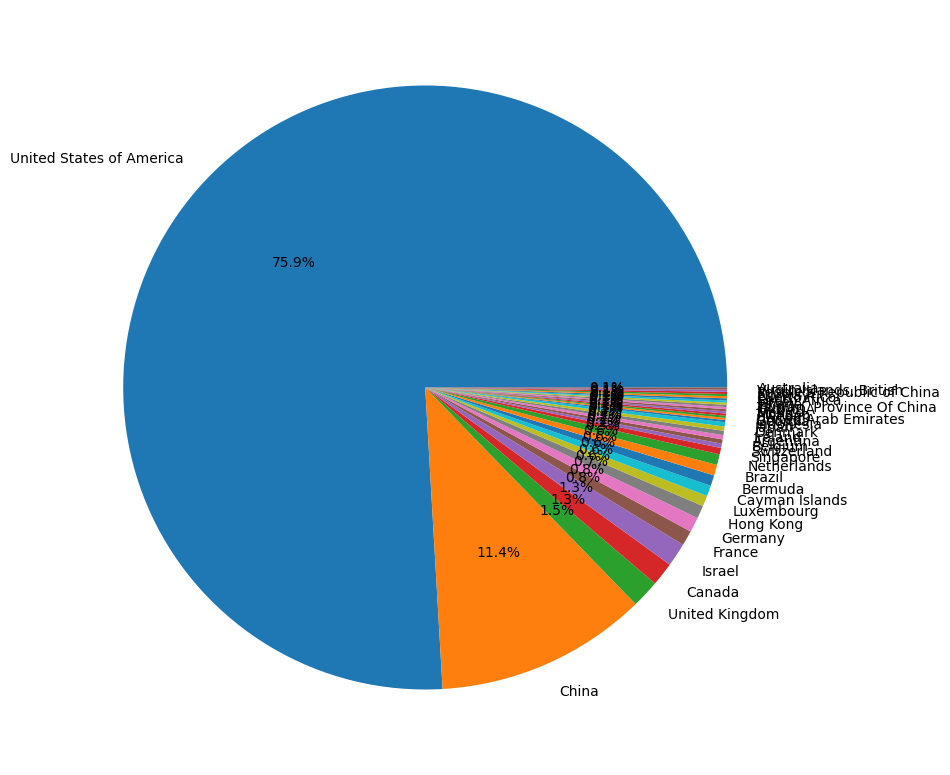

In [42]:
figure(figsize=(10, 10), dpi=100)
plt.pie(df.country.value_counts(), labels=df.country.value_counts().index, autopct='%1.1f%%')
plt.show() 

In [47]:
meadian_number_of_country = st.median(df.country.value_counts())
mode_number_of_country = st.mode(df.country.value_counts())
mode_number_of_country

1